In [1]:
import pandas as pd
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() 
sns.set_style("darkgrid")

In [2]:
os.chdir ('/Users/ozlemalbayrak/Downloads/SPICED/EXERCISES/week8')

In [3]:
# STEP 1: Getting data
df_m=pd.read_csv('monday.csv', sep=';', index_col=0, parse_dates=True)
df_t=pd.read_csv('tuesday.csv', sep=';', index_col=0, parse_dates=True)
df_w=pd.read_csv('wednesday.csv', sep=';', index_col=0, parse_dates=True)
df_tr=pd.read_csv('thursday.csv', sep=';', index_col=0, parse_dates=True)
df_f=pd.read_csv('friday.csv', sep=';', index_col=0, parse_dates=True)

In [4]:
#df=pd.concat([df_m, df_t, df_w, df_tr, df_f], axis=1, ignore_index=True)

In [5]:
#Processing data: create uniqe customer ids for each day
df_m['cus_id']=	'M-' + df_m['customer_no'].astype(str)
df_t['cus_id']=	'T-' + df_t['customer_no'].astype(str)
df_w['cus_id']=	'W-' + df_w['customer_no'].astype(str)
df_tr['cus_id']=	'TR-' + df_tr['customer_no'].astype(str)
df_f['cus_id']=	'F-' + df_f['customer_no'].astype(str)

In [6]:
#Processing data: create day column before appending days
df_m['day']='monday'
df_t['day']='tuesday'
df_w['day']='wednesday'
df_tr['day']='thursday'
df_f['day']='friday'

In [7]:
#len(df)
#df['location'].value_counts()
#df.describe()

In [8]:
#df.agg(
#    ["median","mean","std"]
#)

In [9]:
# Appending: 
df=df_m.append(df_t)
df=df.append(df_w)
df=df.append(df_tr)
df=df.append(df_f)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  int64 
 1   location     24877 non-null  object
 2   cus_id       24877 non-null  object
 3   day          24877 non-null  object
dtypes: int64(1), object(3)
memory usage: 971.8+ KB


In [11]:
df['day'].value_counts()

friday       5125
thursday     5104
wednesday    5050
monday       4884
tuesday      4714
Name: day, dtype: int64

In [12]:

#2-Calculate the total number of customers in each section over time
# hours = df.index.hour
# df=pd.concat([df, pd.DataFrame(hours, index=df.index)], axis = 1)
# df['hour']=df['timestamp']
df['hour']=df.index.hour
df

,customer_no,location,cus_id,day,hour
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,M-1,monday,7
2019-09-02 07:03:00,2,dairy,M-2,monday,7
2019-09-02 07:04:00,3,dairy,M-3,monday,7
2019-09-02 07:04:00,4,dairy,M-4,monday,7
2019-09-02 07:04:00,5,spices,M-5,monday,7
...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,F-1500,friday,21
2019-09-06 21:50:00,1507,checkout,F-1507,friday,21
2019-09-06 21:50:00,1508,checkout,F-1508,friday,21


In [13]:
min = df.index.minute
df=pd.concat([df, pd.DataFrame(min, index=df.index)], axis = 1)
df['min']=df['timestamp']
df= df.drop('timestamp', axis=1)

In [14]:
df

,customer_no,location,cus_id,day,hour,min
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,M-1,monday,7,3
2019-09-02 07:03:00,2,dairy,M-2,monday,7,3
2019-09-02 07:04:00,3,dairy,M-3,monday,7,4
2019-09-02 07:04:00,4,dairy,M-4,monday,7,4
2019-09-02 07:04:00,5,spices,M-5,monday,7,4
...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,F-1500,friday,21,50
2019-09-06 21:50:00,1507,checkout,F-1507,friday,21,50
2019-09-06 21:50:00,1508,checkout,F-1508,friday,21,50


In [15]:
#1: Total number of customer in each section
loc = df.groupby(['location'])[['customer_no']].nunique().reset_index()
loc

,location,customer_no
0,checkout,1532
1,dairy,1483
2,drinks,1434
3,fruit,1494
4,spices,1393


In [16]:
#1: Total number of customer in each section
loc1 = df.groupby(['location'])[['cus_id']].nunique().reset_index()
loc1

,location,cus_id
0,checkout,7417
1,dairy,3818
2,drinks,3214
3,fruit,4284
4,spices,2938


In [17]:
#1: Total number of customer by day
day_c = df.groupby(['day'])[['cus_id']].nunique().reset_index()
day_c

,day,cus_id
0,friday,1510
1,monday,1447
2,thursday,1535
3,tuesday,1422
4,wednesday,1531


In [18]:
l = df.groupby("location")

In [19]:
for locations, group in l:
    print(group),
    print('cus_id'),
    print("/")

                     customer_no  location  cus_id     day  hour  min
timestamp                                                            
2019-09-02 07:05:00            1  checkout     M-1  monday     7    5
2019-09-02 07:05:00            5  checkout     M-5  monday     7    5
2019-09-02 07:06:00            2  checkout     M-2  monday     7    6
2019-09-02 07:06:00            3  checkout     M-3  monday     7    6
2019-09-02 07:07:00            8  checkout     M-8  monday     7    7
...                          ...       ...     ...     ...   ...  ...
2019-09-06 21:47:00         1502  checkout  F-1502  friday    21   47
2019-09-06 21:48:00         1501  checkout  F-1501  friday    21   48
2019-09-06 21:48:00         1504  checkout  F-1504  friday    21   48
2019-09-06 21:50:00         1507  checkout  F-1507  friday    21   50
2019-09-06 21:50:00         1508  checkout  F-1508  friday    21   50

[7417 rows x 6 columns]
cus_id
/
                     customer_no location  cus_id     da

In [20]:
loc1["cus_id"] #number of customer by location

0    7417
1    3818
2    3214
3    4284
4    2938
Name: cus_id, dtype: int64

<Figure size 1152x576 with 0 Axes>

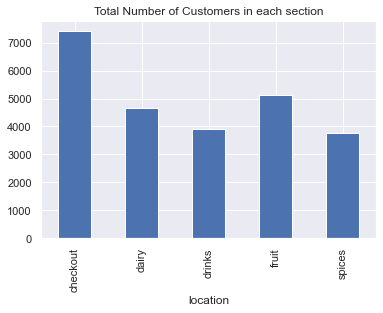

<Figure size 1152x576 with 0 Axes>

In [21]:
l["cus_id"].count().plot.bar(title='Total Number of Customers in each section')
plt.figure(figsize=(16,8))

#plt.ylim(0, 8000)

In [22]:
#2 : Calculate the total number of customers in each section over time
loct= df.groupby(['location', 'day'])[['cus_id']].nunique().reset_index()
loct


,location,day,cus_id
0,checkout,friday,1502
1,checkout,monday,1437
2,checkout,thursday,1532
3,checkout,tuesday,1420
4,checkout,wednesday,1526
5,dairy,friday,761
6,dairy,monday,720
7,dairy,thursday,782
8,dairy,tuesday,751
9,dairy,wednesday,804


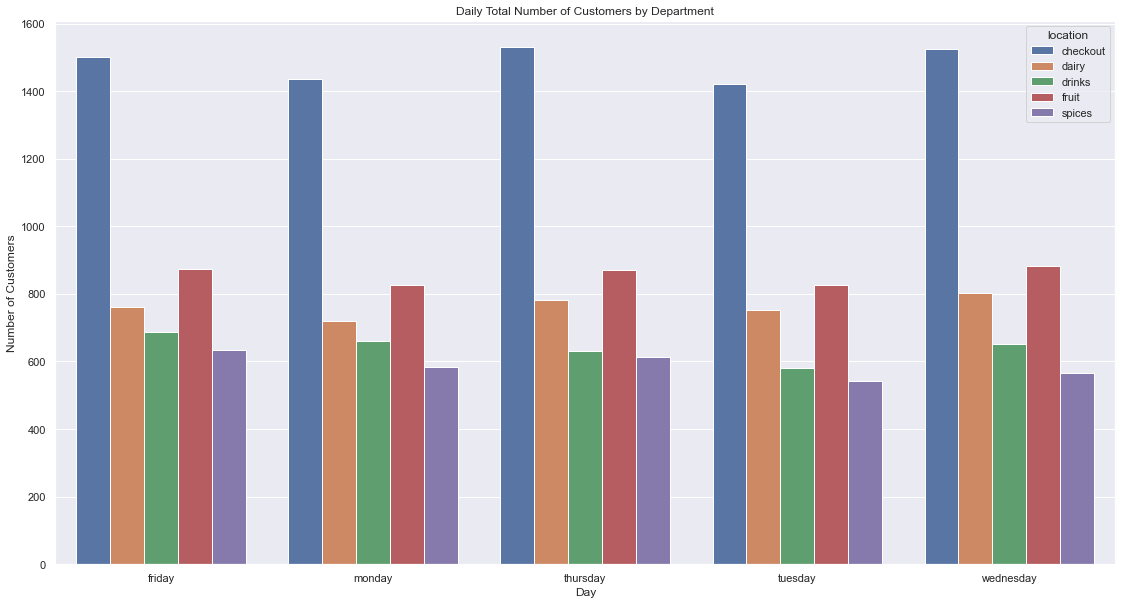

In [23]:
#Visualisation: the total number of customers in each section over time
plt.figure(figsize=(19,10))
sns.barplot(data =loct, x='day', y ='cus_id', hue='location')
plt.xlabel('Day')
plt.ylabel('Number of Customers')
plt.title('Daily Total Number of Customers by Department')
#plt.ylim(6, 14)
plt.show()



#sns.barplot(data =df.loc[df['location']=='checkout'], x='day', y ='customer_no')
#plt.xlabel('day')
#plt.ylabel('Number of Customers')
#plt.title('Total Number of Customers at Checkout')
#plt.ylim(6, 14)
#plt.show()

In [24]:
# Total number of customers in each section over time
#df['hour'] = df['timestamp'].apply(lambda x: x.hour)
loc_h = df.groupby(['location','hour'])[['cus_id']].count().reset_index()
loc_h.head()



,location,hour,cus_id
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342


In [25]:
cus_h = df.groupby(['hour'])[['cus_id']].count().reset_index()
cus_h.head()

,hour,cus_id
0,7,1544
1,8,2290
2,9,1520
3,10,1431
4,11,1111


/Users/ozlemalbayrak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


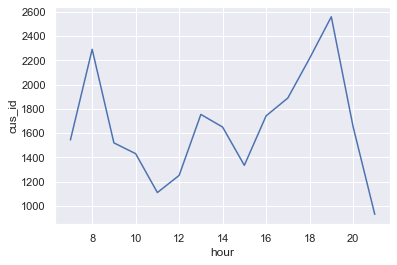

In [26]:
sns.lineplot('hour', 'cus_id', data=cus_h);

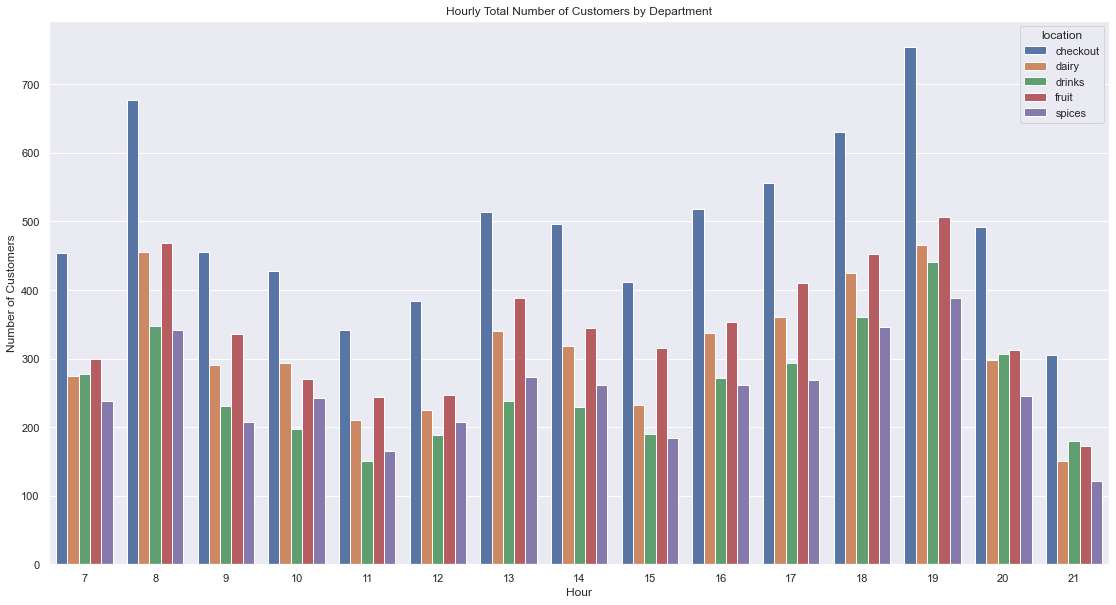

In [27]:
plt.figure(figsize=(19,10))
sns.barplot(data =loc_h, x = 'hour', y ='cus_id', hue='location')
plt.xlabel('Hour')
plt.ylabel('Number of Customers')
plt.title('Hourly Total Number of Customers by Department')
#plt.ylim(6, 14)
plt.show()

/Users/ozlemalbayrak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


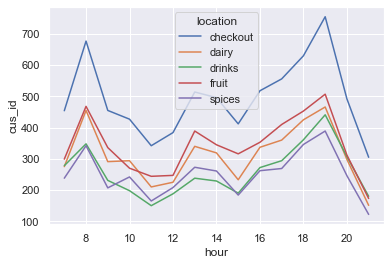

In [28]:
sns.lineplot("hour","cus_id",hue="location",data=loc_h);

In [29]:
checkout=loc_h[loc_h["location"]=="checkout"]
checkout

,location,hour,cus_id
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
5,checkout,12,384
6,checkout,13,514
7,checkout,14,496
8,checkout,15,412
9,checkout,16,518


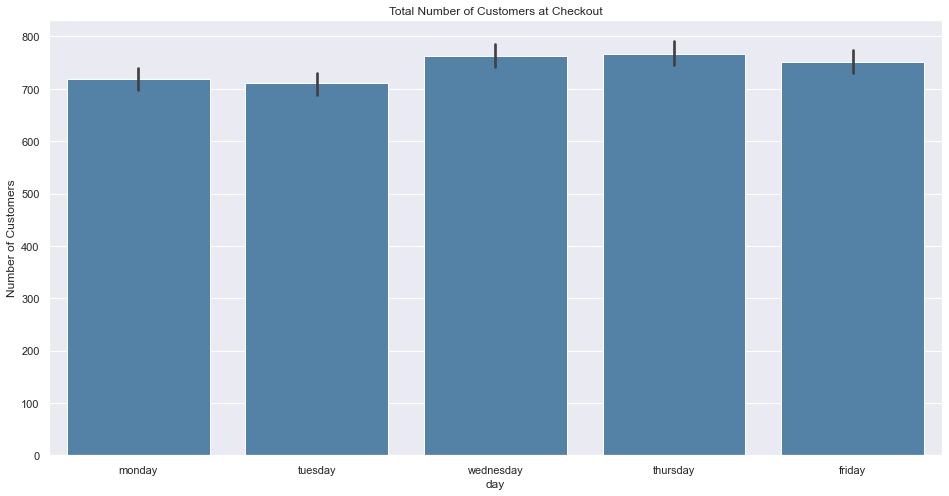

In [30]:
#Display the number of customers at checkout over time
plt.figure(figsize=(16,8))
sns.barplot(data =df.loc[df['location']=='checkout'], x='day', y ='customer_no', color='steelblue')
plt.xlabel('day')
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers at Checkout')
#plt.ylim(6, 14)
plt.show()

/Users/ozlemalbayrak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


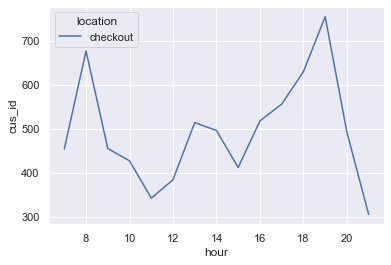

In [31]:
sns.lineplot("hour","cus_id",hue="location",data=checkout);

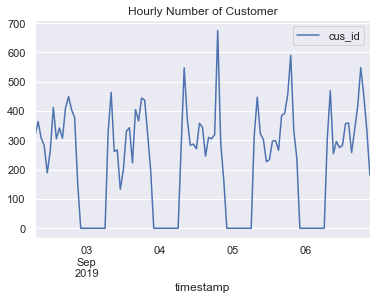

In [32]:
df.resample('H')[['cus_id']].count().plot(
    title = 'Hourly Number of Customer')
sns.despine()


In [33]:
#df['a']=df[['customer_no']].index.max-df[['customer_no']].index.min

In [34]:
df

,customer_no,location,cus_id,day,hour,min
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,M-1,monday,7,3
2019-09-02 07:03:00,2,dairy,M-2,monday,7,3
2019-09-02 07:04:00,3,dairy,M-3,monday,7,4
2019-09-02 07:04:00,4,dairy,M-4,monday,7,4
2019-09-02 07:04:00,5,spices,M-5,monday,7,4
...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,F-1500,friday,21,50
2019-09-06 21:50:00,1507,checkout,F-1507,friday,21,50
2019-09-06 21:50:00,1508,checkout,F-1508,friday,21,50


In [35]:

df['tot_cus']=df.groupby(["location", "day"])["cus_id"].transform("count")

In [36]:
#Calculate the time each customer spent in the market


In [37]:
#BONUS: Create the revenues per min for each department
df.loc[df['location'] == 'fruit', 'revenue'] = 4
df.loc[df['location'] == 'spices', 'revenue'] = 3
df.loc[df['location'] =='dairy', 'revenue'] =5
df.loc[df['location'] == 'drinks', 'revenue'] =6

In [38]:
#Estimate the total revenue for a customer 
df['tot_rev']=df.groupby(["cus_id"])["revenue"].transform("sum")

In [39]:
cus_loc=df.groupby(["cus_id", "location"])

In [40]:
df[df['cus_id']=='M-30']

,customer_no,location,cus_id,day,hour,min,tot_cus,revenue,tot_rev
timestamp,,,,,,,,,
2019-09-02 07:17:00,30,spices,M-30,monday,7,17,750,3.0,22.0
2019-09-02 07:18:00,30,drinks,M-30,monday,7,18,797,6.0,22.0
2019-09-02 07:19:00,30,fruit,M-30,monday,7,19,1005,4.0,22.0
2019-09-02 07:20:00,30,dairy,M-30,monday,7,20,895,5.0,22.0
2019-09-02 07:21:00,30,fruit,M-30,monday,7,21,1005,4.0,22.0
2019-09-02 07:23:00,30,checkout,M-30,monday,7,23,1437,NaN,22.0


In [41]:
#time spent in market by customers
loc_m = df.groupby(['location','min'])[['cus_id']].count().reset_index()
loc_m.head()
#df["datetime"].max() - df["datetime"].min()

,location,min,cus_id
0,checkout,0,116
1,checkout,1,111
2,checkout,2,122
3,checkout,3,124
4,checkout,4,109


In [42]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
import pandas, numpy as np 

In [43]:
loc_daily = df.groupby(['location','day'])[['cus_id']].count().reset_index()
loc_daily

,location,day,cus_id
0,checkout,friday,1502
1,checkout,monday,1437
2,checkout,thursday,1532
3,checkout,tuesday,1420
4,checkout,wednesday,1526
5,dairy,friday,932
6,dairy,monday,895
7,dairy,thursday,965
8,dairy,tuesday,911
9,dairy,wednesday,976


<Figure size 1152x576 with 0 Axes>

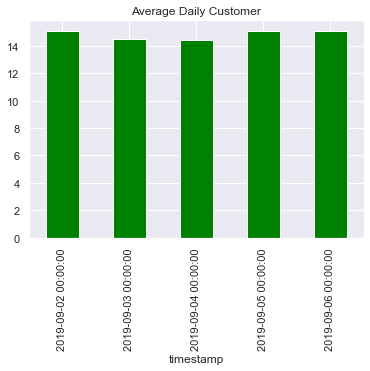

<Figure size 1152x576 with 0 Axes>

In [44]:
df['tot_rev'].resample('D').mean().plot(kind='bar', color='green', title='Average Daily Customer')
plt.figure(figsize=(16,8))
#plt.title('Average Daily Customer')


<AxesSubplot:ylabel='Density'>

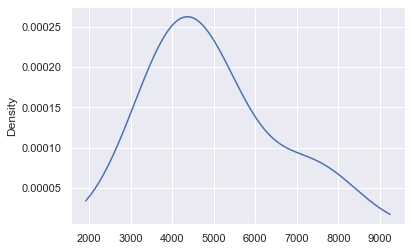

In [45]:
import matplotlib.pyplot as plt
l["customer_no"].count().plot(x='hour', kind='kde', ax=plt.gca())

In [46]:

#Time each customer spent in market
#cus name
#from faker import Faker


In [47]:
loc_time=df.groupby(['location','hour'])['customer_no'].count().to_frame().reset_index()
loc_time.head()


,location,hour,customer_no
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342


In [48]:
df1=df.reset_index()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24877 entries, 0 to 24876
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    24877 non-null  datetime64[ns]
 1   customer_no  24877 non-null  int64         
 2   location     24877 non-null  object        
 3   cus_id       24877 non-null  object        
 4   day          24877 non-null  object        
 5   hour         24877 non-null  int64         
 6   min          24877 non-null  int64         
 7   tot_cus      24877 non-null  int64         
 8   revenue      17460 non-null  float64       
 9   tot_rev      24877 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 1.9+ MB


In [49]:
time_spent=df1.groupby(['cus_id',"day"])['timestamp'].max().to_frame()-df1.groupby(['cus_id',"day"])['timestamp'].min().to_frame()
time_spent.head()
#to_frame() converts series to DataFrame

,,timestamp
cus_id,day,
F-1,friday,0 days 00:05:00
F-10,friday,0 days 00:05:00
F-100,friday,0 days 00:01:00
F-1000,friday,0 days 00:01:00
F-1001,friday,0 days 00:10:00


In [50]:
time_spent=time_spent.reset_index()
time_spent.head()

,cus_id,day,timestamp
0,F-1,friday,0 days 00:05:00
1,F-10,friday,0 days 00:05:00
2,F-100,friday,0 days 00:01:00
3,F-1000,friday,0 days 00:01:00
4,F-1001,friday,0 days 00:10:00


In [51]:
df1.groupby('cus_id')["location","timestamp"].first()

/var/folders/kv/jcs6c4v14wjbft5xv3xp0sqr0000gn/T/ipykernel_78745/3682468341.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('cus_id')["location","timestamp"].first()


,location,timestamp
cus_id,,
F-1,dairy,2019-09-06 07:00:00
F-10,fruit,2019-09-06 07:06:00
F-100,fruit,2019-09-06 08:03:00
F-1000,fruit,2019-09-06 17:19:00
F-1001,fruit,2019-09-06 17:19:00
...,...,...
W-995,fruit,2019-09-04 16:52:00
W-996,fruit,2019-09-04 16:52:00
W-997,dairy,2019-09-04 16:52:00


In [52]:
temp=time_spent.groupby("cus_id")["timestamp"].sum().to_frame()
temp=temp.reset_index()
temp.head()

,cus_id,timestamp
0,F-1,0 days 00:05:00
1,F-10,0 days 00:05:00
2,F-100,0 days 00:01:00
3,F-1000,0 days 00:01:00
4,F-1001,0 days 00:10:00


In [53]:
temp["min_spent"]=temp["timestamp"]
temp.head()

,cus_id,timestamp,min_spent
0,F-1,0 days 00:05:00,0 days 00:05:00
1,F-10,0 days 00:05:00,0 days 00:05:00
2,F-100,0 days 00:01:00,0 days 00:01:00
3,F-1000,0 days 00:01:00,0 days 00:01:00
4,F-1001,0 days 00:10:00,0 days 00:10:00


In [54]:
time_spent=time_spent.merge(temp,how="inner",on="cus_id")

In [55]:
time_spent.drop(["timestamp_x","timestamp_y"],axis=1,inplace=True)


In [56]:
time_spent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7445 entries, 0 to 7444
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   cus_id     7445 non-null   object         
 1   day        7445 non-null   object         
 2   min_spent  7445 non-null   timedelta64[ns]
dtypes: object(2), timedelta64[ns](1)
memory usage: 232.7+ KB


In [57]:
time_spent["min_spent"]=time_spent["min_spent"] / np.timedelta64(1, 'm') #creating integers from datetime object

In [58]:
time_spent.head()

,cus_id,day,min_spent
0,F-1,friday,5.0
1,F-10,friday,5.0
2,F-100,friday,1.0
3,F-1000,friday,1.0
4,F-1001,friday,10.0


In [59]:
y=time_spent[time_spent["min_spent"]==0].index
y

Int64Index([564, 567, 569, 1999, 2006, 2007, 2008, 4972, 4973], dtype='int64')

In [60]:
time_spent.drop(y, axis=0)

,cus_id,day,min_spent
0,F-1,friday,5.0
1,F-10,friday,5.0
2,F-100,friday,1.0
3,F-1000,friday,1.0
4,F-1001,friday,10.0
...,...,...,...
7440,W-995,wednesday,28.0
7441,W-996,wednesday,11.0
7442,W-997,wednesday,22.0
7443,W-998,wednesday,6.0


<AxesSubplot:xlabel='min_spent', ylabel='Count'>

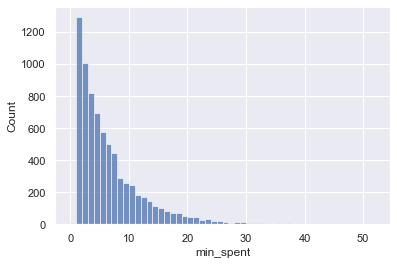

In [61]:
sns.histplot(data=time_spent['min_spent'],binwidth=1)

In [62]:
#Which section customers visit first....
df1.groupby('cus_id')["location","timestamp"].first()


/var/folders/kv/jcs6c4v14wjbft5xv3xp0sqr0000gn/T/ipykernel_78745/3521922212.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('cus_id')["location","timestamp"].first()


,location,timestamp
cus_id,,
F-1,dairy,2019-09-06 07:00:00
F-10,fruit,2019-09-06 07:06:00
F-100,fruit,2019-09-06 08:03:00
F-1000,fruit,2019-09-06 17:19:00
F-1001,fruit,2019-09-06 17:19:00
...,...,...
W-995,fruit,2019-09-04 16:52:00
W-996,fruit,2019-09-04 16:52:00
W-997,dairy,2019-09-04 16:52:00


In [63]:
first_section=df1.groupby('cus_id')['timestamp','location'].first().reset_index()

/var/folders/kv/jcs6c4v14wjbft5xv3xp0sqr0000gn/T/ipykernel_78745/184270883.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  first_section=df1.groupby('cus_id')['timestamp','location'].first().reset_index()


In [64]:
first_section

,cus_id,timestamp,location
0,F-1,2019-09-06 07:00:00,dairy
1,F-10,2019-09-06 07:06:00,fruit
2,F-100,2019-09-06 08:03:00,fruit
3,F-1000,2019-09-06 17:19:00,fruit
4,F-1001,2019-09-06 17:19:00,fruit
...,...,...,...
7440,W-995,2019-09-04 16:52:00,fruit
7441,W-996,2019-09-04 16:52:00,fruit
7442,W-997,2019-09-04 16:52:00,dairy
7443,W-998,2019-09-04 16:53:00,dairy


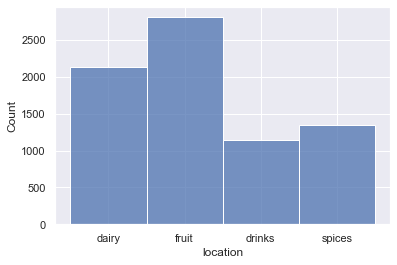

In [65]:
sns.histplot(first_section['location']);


In [66]:
first_section["first"]="first"

In [67]:
df_total=df1.merge(first_section,how="left",on=("cus_id","timestamp","location"))

In [68]:
df_total["first"]=df_total["first"].fillna("follow")

In [69]:
#df_total.head()
df_total[df_total['customer_no']==1000]

,timestamp,customer_no,location,cus_id,day,hour,min,tot_cus,revenue,tot_rev,first
3400,2019-09-02 17:44:00,1000,dairy,M-1000,monday,17,44,895,5.0,11.0,first
3436,2019-09-02 17:50:00,1000,drinks,M-1000,monday,17,50,797,6.0,11.0,follow
3443,2019-09-02 17:51:00,1000,checkout,M-1000,monday,17,51,1437,NaN,11.0,follow
8150,2019-09-03 17:53:00,1000,fruit,T-1000,tuesday,17,53,976,4.0,9.0,first
8162,2019-09-03 17:54:00,1000,dairy,T-1000,tuesday,17,54,911,5.0,9.0,follow
8177,2019-09-03 17:57:00,1000,checkout,T-1000,tuesday,17,57,1420,NaN,9.0,follow
12858,2019-09-04 16:53:00,1000,spices,W-1000,wednesday,16,53,730,3.0,11.0,first
12865,2019-09-04 16:54:00,1000,dairy,W-1000,wednesday,16,54,976,5.0,11.0,follow
12911,2019-09-04 17:03:00,1000,spices,W-1000,wednesday,17,3,730,3.0,11.0,follow
12928,2019-09-04 17:06:00,1000,checkout,W-1000,wednesday,17,6,1526,NaN,11.0,follow


Text(0.5, 1.0, 'Follow_section')

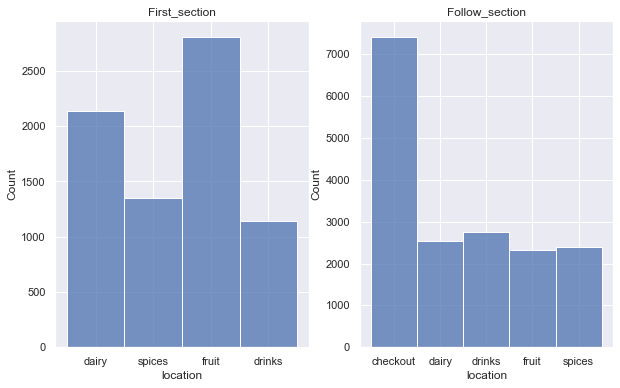

In [70]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(10, 6)
sns.histplot(x=df_total[df_total['first']=='first']['location'], data=df_total,ax=ax1).set_title('First_section')
sns.histplot(x=df_total[df_total['first']=='follow']['location'], data=df_total,ax=ax2).set_title('Follow_section')

In [71]:
df1.head()
df_total.head()

,timestamp,customer_no,location,cus_id,day,hour,min,tot_cus,revenue,tot_rev,first
0,2019-09-02 07:03:00,1,dairy,M-1,monday,7,3,895,5.0,5.0,first
1,2019-09-02 07:03:00,2,dairy,M-2,monday,7,3,895,5.0,5.0,first
2,2019-09-02 07:04:00,3,dairy,M-3,monday,7,4,895,5.0,5.0,first
3,2019-09-02 07:04:00,4,dairy,M-4,monday,7,4,895,5.0,5.0,first
4,2019-09-02 07:04:00,5,spices,M-5,monday,7,4,750,3.0,3.0,first


In [72]:
df_total=df_total.set_index('timestamp')

In [73]:
df_total

,customer_no,location,cus_id,day,hour,min,tot_cus,revenue,tot_rev,first
timestamp,,,,,,,,,,
2019-09-02 07:03:00,1,dairy,M-1,monday,7,3,895,5.0,5.0,first
2019-09-02 07:03:00,2,dairy,M-2,monday,7,3,895,5.0,5.0,first
2019-09-02 07:04:00,3,dairy,M-3,monday,7,4,895,5.0,5.0,first
2019-09-02 07:04:00,4,dairy,M-4,monday,7,4,895,5.0,5.0,first
2019-09-02 07:04:00,5,spices,M-5,monday,7,4,750,3.0,3.0,first
...,...,...,...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,F-1500,friday,21,50,932,5.0,17.0,follow
2019-09-06 21:50:00,1507,checkout,F-1507,friday,21,50,1502,NaN,5.0,follow
2019-09-06 21:50:00,1508,checkout,F-1508,friday,21,50,1502,NaN,5.0,follow


In [74]:
min_data=df_total.groupby('cus_id').resample('T').ffill()

In [75]:
min_data.head()

customer_no location cus_id     day  hour  min  \
cus_id timestamp                                                             
F-1    2019-09-06 07:00:00            1    dairy    F-1  friday     7    0   
       2019-09-06 07:01:00            1    dairy    F-1  friday     7    0   
       2019-09-06 07:02:00            1    dairy    F-1  friday     7    0   
       2019-09-06 07:03:00            1    dairy    F-1  friday     7    0   
       2019-09-06 07:04:00            1   spices    F-1  friday     7    4   

                            tot_cus  revenue  tot_rev   first  
cus_id timestamp                                               
F-1    2019-09-06 07:00:00      932      5.0      8.0   first  
       2019-09-06 07:01:00      932      5.0      8.0   first  
       2019-09-06 07:02:00      932      5.0      8.0   first  
       2019-09-06 07:03:00      932      5.0      8.0   first  
       2019-09-06 07:04:00      790      3.0      8.0  follow

In [76]:
min_data["before"]=min_data["location"].shift(1)
min_data["after"]=min_data["location"]

In [77]:
min_data.head()

customer_no location cus_id     day  hour  min  \
cus_id timestamp                                                             
F-1    2019-09-06 07:00:00            1    dairy    F-1  friday     7    0   
       2019-09-06 07:01:00            1    dairy    F-1  friday     7    0   
       2019-09-06 07:02:00            1    dairy    F-1  friday     7    0   
       2019-09-06 07:03:00            1    dairy    F-1  friday     7    0   
       2019-09-06 07:04:00            1   spices    F-1  friday     7    4   

                            tot_cus  revenue  tot_rev   first before   after  
cus_id timestamp                                                              
F-1    2019-09-06 07:00:00      932      5.0      8.0   first    NaN   dairy  
       2019-09-06 07:01:00      932      5.0      8.0   first  dairy   dairy  
       2019-09-06 07:02:00      932      5.0      8.0   first  dairy   dairy  
       2019-09-06 07:03:00      932      5.0      8.0   first  dairy   dairy  
       2019-09-06 07:04:00      790      3.0      8.0  follow  dairy  spices

In [78]:
min_data.loc[min_data['before']=='checkout','before']='entrance'
min_data=min_data.fillna('entrance')

In [79]:
min_data.head(10)


customer_no  location cus_id     day  hour  min  \
cus_id timestamp                                                              
F-1    2019-09-06 07:00:00            1     dairy    F-1  friday     7    0   
       2019-09-06 07:01:00            1     dairy    F-1  friday     7    0   
       2019-09-06 07:02:00            1     dairy    F-1  friday     7    0   
       2019-09-06 07:03:00            1     dairy    F-1  friday     7    0   
       2019-09-06 07:04:00            1    spices    F-1  friday     7    4   
       2019-09-06 07:05:00            1  checkout    F-1  friday     7    5   
F-10   2019-09-06 07:06:00           10     fruit   F-10  friday     7    6   
       2019-09-06 07:07:00           10     fruit   F-10  friday     7    6   
       2019-09-06 07:08:00           10     fruit   F-10  friday     7    6   
       2019-09-06 07:09:00           10     fruit   F-10  friday     7    6   

                            tot_cus   revenue  tot_rev   first    before  \
cus_id timestamp                                                           
F-1    2019-09-06 07:00:00      932       5.0      8.0   first  entrance   
       2019-09-06 07:01:00      932       5.0      8.0   first     dairy   
       2019-09-06 07:02:00      932       5.0      8.0   first     dairy   
       2019-09-06 07:03:00      932       5.0      8.0   first     dairy   
       2019-09-06 07:04:00      790       3.0      8.0  follow     dairy   
       2019-09-06 07:05:00     1502  entrance      8.0  follow    spices   
F-10   2019-09-06 07:06:00     1057       4.0      4.0   first  entrance   
       2019-09-06 07:07:00     1057       4.0      4.0   first     fruit   
       2019-09-06 07:08:00     1057       4.0      4.0   first     fruit   
       2019-09-06 07:09:00     1057       4.0      4.0   first     fruit   

                               after  
cus_id timestamp                      
F-1    2019-09-06 07:00:00     dairy  
       2019-09-06 07:01:00     dairy  
       2019-09-06 07:02:00     dairy  
       2019-09-06 07:03:00     dairy  
       2019-09-06 07:04:00    spices  
       2019-09-06 07:05:00  checkout  
F-10   2019-09-06 07:06:00     fruit  
       2019-09-06 07:07:00     fruit  
       2019-09-06 07:08:00     fruit  
       2019-09-06 07:09:00     fruit

In [80]:
P=pd.crosstab(min_data['before'], min_data['after'],normalize=0)

In [81]:
P

after,checkout,dairy,drinks,fruit,spices
before,,,,,
dairy,0.102678,0.737032,0.058625,0.050073,0.051592
drinks,0.215505,0.011001,0.598499,0.088012,0.086983
entrance,0.000000,0.287583,0.153296,0.377646,0.181475
fruit,0.201054,0.095924,0.055241,0.597104,0.050677
spices,0.149888,0.193533,0.163109,0.091271,0.402198


In [82]:
P.sum(axis=1)

before
dairy       1.0
drinks      1.0
entrance    1.0
fruit       1.0
spices      1.0
dtype: float64

In [83]:
#Simulation for the next monday
Trmatrix=pd.read_csv('/Users/ozlemalbayrak/Downloads/SPICED/EXERCISES/Markov_Simulation/MarkovSimulation/Transition_matrix.csv')

In [84]:
Trmatrix

,before,checkout,dairy,drinks,fruit,spices
0,dairy,0.102678,0.736919,0.058737,0.050129,0.051536
1,drinks,0.215505,0.010899,0.598602,0.088012,0.086983
2,entrance,0.000000,0.287987,0.153296,0.377376,0.181340
3,fruit,0.201054,0.096081,0.055005,0.597025,0.050834
4,spices,0.149888,0.193214,0.163109,0.091590,0.402198


In [85]:
#Probability of customers being at the entrance given the probs of being 
# at the other locations as initial state: Probability of being at the entrance
Pent=Trmatrix.iloc[2,1:].values

In [86]:
Pent

array([0.0, 0.2879870567614939, 0.1532964810570311, 0.3773762976944856,
       0.1813401644869893], dtype=object)

In [87]:
#The probabilities for the next day
np.dot(Pent, P)
# or Pent.dot(P)

array([0.16511659300408743, 0.11854834969169012, 0.2462845668220253,
       0.3251220567606504, 0.14492843372154665], dtype=object)

In [88]:
#The probabilities for many days after
Pent.dot(P).dot(P).dot(P)

array([0.15272108610991614, 0.20167646781516746, 0.22376246593615506,
       0.29231876859225386, 0.12952121154650736], dtype=object)

In [94]:
Trmatrix

,before,checkout,dairy,drinks,fruit,spices
0,dairy,0.102678,0.736919,0.058737,0.050129,0.051536
1,drinks,0.215505,0.010899,0.598602,0.088012,0.086983
2,entrance,0.000000,0.287987,0.153296,0.377376,0.181340
3,fruit,0.201054,0.096081,0.055005,0.597025,0.050834
4,spices,0.149888,0.193214,0.163109,0.091590,0.402198


In [90]:
Pent.dot(P).dot(P).dot(P).dot(P)

array([0.13732909006350974, 0.2322361483986351, 0.2012324347131866,
       0.2962663693019546, 0.13293595752271384], dtype=object)

In [91]:
Pent.dot(P).dot(P).dot(P).dot(P).dot(P).dot(P) #seems stabilised

array([0.13985745977751618, 0.22398650876901885, 0.20839924150187014,
       0.29436831290842436, 0.13338847704317047], dtype=object)

In [103]:
#P.dot(P)
P.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, dairy to spices
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   checkout  5 non-null      float64
 1   dairy     5 non-null      float64
 2   drinks    5 non-null      float64
 3   fruit     5 non-null      float64
 4   spices    5 non-null      float64
dtypes: float64(5)
memory usage: 412.0+ bytes


In [105]:
## Markov Chain Monte Carlo Simulation (MCMC) 🎲
P.loc['dairy']

after
checkout    0.102678
dairy       0.737032
drinks      0.058625
fruit       0.050073
spices      0.051592
Name: dairy, dtype: float64

In [106]:
# probabilitis for a customer being at different locations if customer is at spices
np.random.choice(['checkout',	'dairy',	'drinks',	'fruit',	'spices'], p=P.loc['spices'])

'dairy'

In [120]:
state = 'entrance'
sequence = []
for  i in range(20):
    if state == 'entrance':
        state = np.random.choice(['checkout',	'dairy',	'drinks',	'fruit',	'spices'], p=P.loc['entrance'])
    if state=='dairy': 
        state = np.random.choice(['checkout',	'dairy',	'drinks',	'fruit',	'spices'], p=P.loc['dairy'])
    if state=='drinks': 
        state = np.random.choice(['checkout',	'dairy',	'drinks',	'fruit',	'spices'], p=P.loc['drinks'])
    if state=='fruit': 
        state = np.random.choice(['checkout',	'dairy',	'drinks',	'fruit',	'spices'], p=P.loc['fruit'])
    else: 
        state = np.random.choice(['checkout',	'dairy',	'drinks',	'fruit',	'spices'], p=P.loc['spices'])
    sequence.append(state)

In [121]:
sequence

['drinks',
 'checkout',
 'dairy',
 'spices',
 'drinks',
 'spices',
 'checkout',
 'spices',
 'spices',
 'fruit',
 'checkout',
 'checkout',
 'drinks',
 'fruit',
 'fruit',
 'drinks',
 'spices',
 'checkout',
 'dairy',
 'dairy']